
gen_ds_file =  "../banksformer-forvf/generated_data/gen_num_layers_dec_4-d_model_128-num_heads_4-i_0-dr_0__1-dff_64-opt_adam-l_loss_mse_lwi-0--vf1-len_80.csv"
gen_seq_len = 80


gen_df = pd.read_csv(gen_ds_file)
gen_df

# gen_df["account_id"] = np.arange(len(gen_df)) // 80

real_df = pd.read_csv(f"../banksformer-forvf/stored_data/final_df-{ds_suffix}.csv")
real_df

In [1]:
import os
import sys
import time
import calendar
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy as sp
from scipy import stats
import tensorflow as tf

# from my_lib.field_config import data_encoder

In [2]:
os.listdir("generated_data/")

['parts',
 'gen_num_layers_dec_4-d_model_128-num_heads_4-i_0-dr_0__1-dff_64-opt_adam-l_loss_mse_lwi-0--vf1-len_80.csv']

# Set datasets

In [3]:
# ds_suffix = "vf10k"
ds_suffix = "-czech"
max_seq_len = 80
min_seq_len = 20

In [4]:

gen_ds_file =  "generated_data/gen_num_layers_dec_4-d_model_128-num_heads_4-i_0-dr_0__1-dff_64-opt_adam-l_loss_mse_lwi-0--vf1-len_80.csv"
gen_seq_len = 80


gen_df = pd.read_csv(gen_ds_file)
gen_df

,Unnamed: 0,amount,tcode_nums,date_fields,days_passed,age,date,account_id,tcode
0,0,133.389999,2,06/25,2,38,1993-06-25,0,interest_cr
1,1,635.330017,3,06/29,4,38,1993-06-29,0,cash_db_nan
2,2,1299.930054,3,07/03,4,38,1993-07-03,0,cash_db_nan
3,3,1794.300049,0,07/07,4,38,1993-07-07,0,cash_cr
4,4,6470.669922,3,07/11,4,38,1993-07-11,0,cash_db_nan
...,...,...,...,...,...,...,...,...,...
119995,119995,756.359985,0,09/24,2,71,1993-09-24,1499,cash_cr
119996,119996,160.800003,2,09/26,2,71,1993-09-26,1499,interest_cr
119997,119997,898.440002,1,09/28,2,71,1993-09-28,1499,bank_cr
119998,119998,581.700012,0,10/01,3,71,1993-10-01,1499,cash_cr


In [5]:
# gen_df["account_id"] = np.arange(len(gen_df)) // 80

In [6]:
real_df = pd.read_csv(f"stored_data/final_df-{ds_suffix}.csv")
real_df

,Unnamed: 0,column_a,account_id,date,type,operation,amount,balance,k_symbol,age,tcode,datetime,month,day,dow,year,td
0,0,149432,1,950324,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,29,cash_cr,1995-03-24,3,24,4,1995,0.0
1,1,157404,1,950413,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,4679.0,NaN,29,bank_cr,1995-04-13,4,13,3,1995,20.0
2,2,158832,1,950423,CREDIT,CREDIT IN CASH,12600.0,17279.0,NaN,29,cash_cr,1995-04-23,4,23,6,1995,10.0
3,3,162681,1,950430,CREDIT,NaN,19.2,17298.2,INTEREST CREDITED,29,interest_cr,1995-04-30,4,30,6,1995,7.0
4,4,167083,1,950513,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,20977.2,NaN,29,bank_cr,1995-05-13,5,13,5,1995,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,1056315,1033141,11382,981202,DEBIT,CASH WITHDRAWAL,25600.0,41114.4,NaN,46,cash_db_nan,1998-12-02,12,2,2,1998,2.0
1056316,1056316,1040574,11382,981210,CREDIT,COLLECTION FROM ANOTHER BANK,46248.0,87362.4,NaN,46,bank_cr,1998-12-10,12,10,3,1998,8.0
1056317,1056317,1050362,11382,981225,DEBIT,CASH WITHDRAWAL,6300.0,81062.4,NaN,46,cash_db_nan,1998-12-25,12,25,4,1998,15.0
1056318,1056318,1053037,11382,981231,CREDIT,NaN,311.3,81373.6,INTEREST CREDITED,46,interest_cr,1998-12-31,12,31,3,1998,6.0


### Reduce size to make analysis faster  
NOTE: You can skip this section to continue with the full datasets

In [7]:
len(real_df), len(real_df["account_id"].unique())

(1056320, 4500)

In [8]:
len(gen_df), len(gen_df["account_id"].unique())

(120000, 1500)

In [9]:
n_accts_keep = 2500


n_accts_keep_real = min(n_accts_keep, len(real_df["account_id"].unique()))
n_accts_keep_gen = min(n_accts_keep, len(gen_df["account_id"].unique()))
                   




accts_real_keep = np.random.choice(real_df["account_id"].unique(), replace=False, size=n_accts_keep_real)
accts_gen_keep = np.random.choice( gen_df["account_id"].unique() , replace=False, size=n_accts_keep_gen)

real_df =real_df[real_df["account_id"].apply(lambda x: x in accts_real_keep)].reset_index()
gen_df  = gen_df[gen_df["account_id"].apply( lambda x: x in accts_gen_keep)].reset_index()

### Ensure 'datetime' and 'days_passed' fields are present in both dataframes

In [10]:
# real_df["datetime"] = pd.to_datetime(real_df["date"], format="%y%m%d")

real_df["days_passed"] = real_df["td"]
real_df["datetime"] = pd.to_datetime(real_df["datetime"], format="%Y/%m/%d")
gen_df["datetime"] = pd.to_datetime(gen_df["date"], format="%Y-%m-%d")

In [11]:
real_df

,index,Unnamed: 0,column_a,account_id,date,type,operation,amount,balance,k_symbol,age,tcode,datetime,month,day,dow,year,td,days_passed
0,239,239,450,2,930226,CREDIT,CREDIT IN CASH,1100.0,1100.0,NaN,54,cash_cr,1993-02-26,2,26,4,1993,0.0,0.0
1,240,240,809,2,930312,CREDIT,COLLECTION FROM ANOTHER BANK,20236.0,21336.0,NaN,54,bank_cr,1993-03-12,3,12,4,1993,14.0,14.0
2,241,241,1032,2,930328,CREDIT,CREDIT IN CASH,3700.0,25036.0,NaN,54,cash_cr,1993-03-28,3,28,6,1993,16.0,16.0
3,242,242,1241,2,930331,CREDIT,NaN,13.5,25049.5,INTEREST CREDITED,54,interest_cr,1993-03-31,3,31,2,1993,3.0,3.0
4,243,243,1563,2,930412,CREDIT,COLLECTION FROM ANOTHER BANK,20236.0,45285.5,NaN,54,bank_cr,1993-04-12,4,12,0,1993,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582562,1056062,1056062,1038058,11362,981208,DEBIT,REMITTANCE TO ANOTHER BANK,56.0,51419.8,,37,bank_db,1998-12-08,12,8,1,1998,1.0,1.0
582563,1056063,1056063,1040575,11362,981210,DEBIT,REMITTANCE TO ANOTHER BANK,4780.0,46639.8,HOUSEHOLD,37,bank_db_hh,1998-12-10,12,10,3,1998,2.0,2.0
582564,1056064,1056064,1043000,11362,981212,DEBIT,REMITTANCE TO ANOTHER BANK,5392.0,41247.8,LOAN PAYMENT,37,loan_db,1998-12-12,12,12,5,1998,2.0,2.0
582565,1056065,1056065,1048553,11362,981219,DEBIT,CASH WITHDRAWAL,2880.0,38367.8,NaN,37,cash_db_nan,1998-12-19,12,19,5,1998,7.0,7.0


In [12]:
gen_df

,index,Unnamed: 0,amount,tcode_nums,date_fields,days_passed,age,date,account_id,tcode,datetime
0,0,0,133.389999,2,06/25,2,38,1993-06-25,0,interest_cr,1993-06-25
1,1,1,635.330017,3,06/29,4,38,1993-06-29,0,cash_db_nan,1993-06-29
2,2,2,1299.930054,3,07/03,4,38,1993-07-03,0,cash_db_nan,1993-07-03
3,3,3,1794.300049,0,07/07,4,38,1993-07-07,0,cash_cr,1993-07-07
4,4,4,6470.669922,3,07/11,4,38,1993-07-11,0,cash_db_nan,1993-07-11
...,...,...,...,...,...,...,...,...,...,...,...
119995,119995,119995,756.359985,0,09/24,2,71,1993-09-24,1499,cash_cr,1993-09-24
119996,119996,119996,160.800003,2,09/26,2,71,1993-09-26,1499,interest_cr,1993-09-26
119997,119997,119997,898.440002,1,09/28,2,71,1993-09-28,1499,bank_cr,1993-09-28
119998,119998,119998,581.700012,0,10/01,3,71,1993-10-01,1499,cash_cr,1993-10-01


# Overview

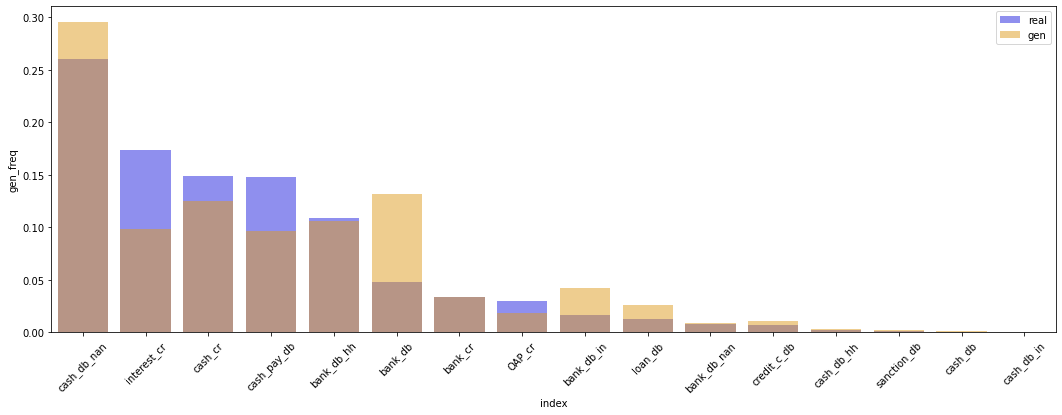

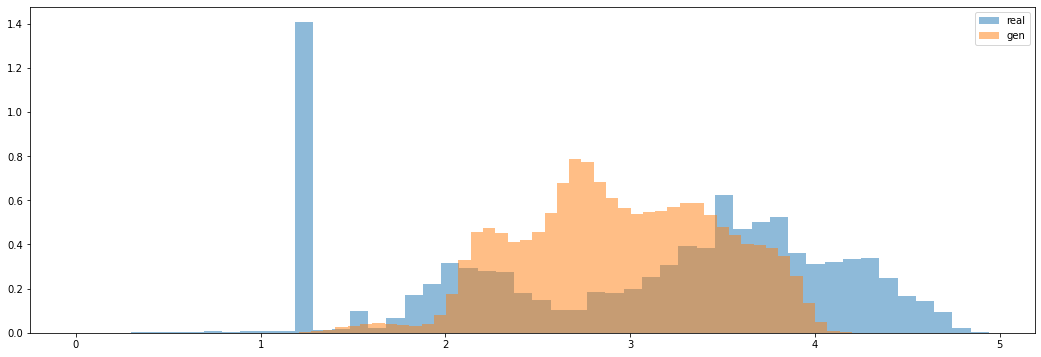





cash_db_nan 0


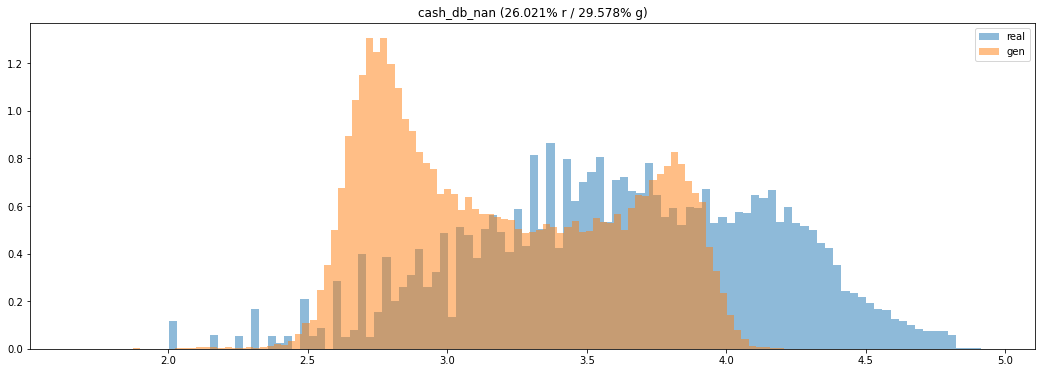

Real:	mean is 3.63,	median is 3.64,	std is 0.53,	min is 2.00,	max is 4.94,	log_abs_mean is 0.66,
Gen:	mean is 3.20,	median is 3.12,	std is 0.44,	min is 1.67,	max is 4.21,	log_abs_mean is 0.62,
interest_cr 1


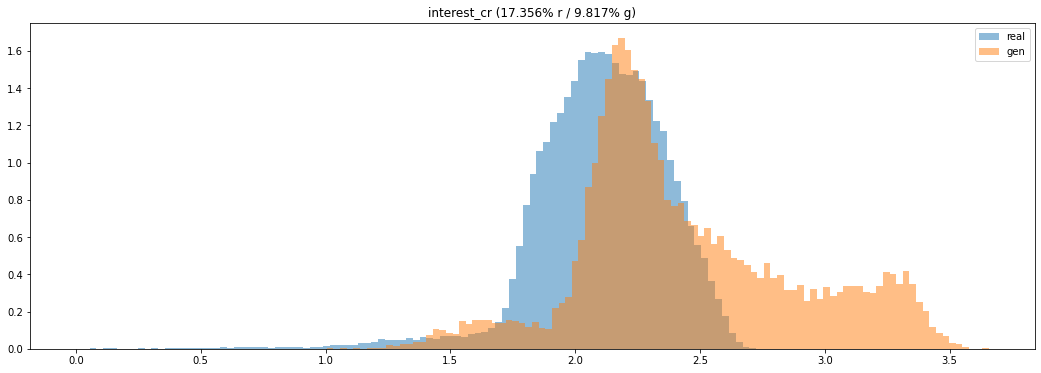

Real:	mean is 2.10,	median is 2.12,	std is 0.27,	min is 0.00,	max is 2.75,	log_abs_mean is 0.49,
Gen:	mean is 2.44,	median is 2.32,	std is 0.44,	min is 1.01,	max is 3.66,	log_abs_mean is 0.53,
cash_cr 2


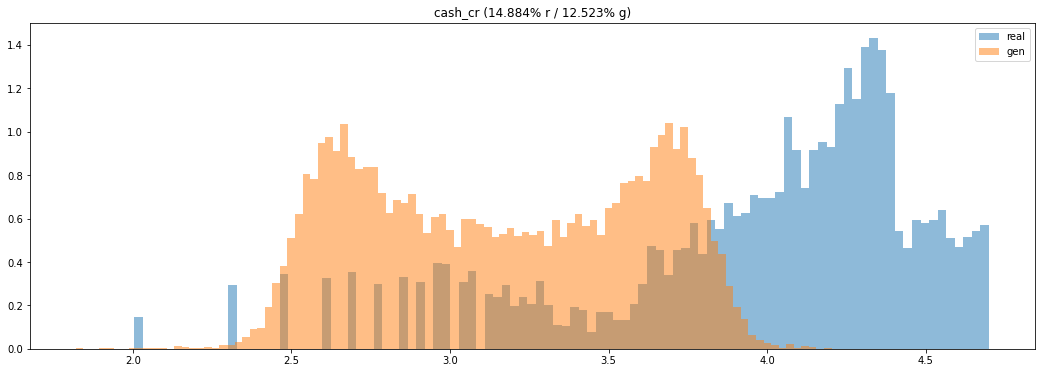

Real:	mean is 3.96,	median is 4.10,	std is 0.54,	min is 2.00,	max is 4.70,	log_abs_mean is 0.69,
Gen:	mean is 3.17,	median is 3.16,	std is 0.44,	min is 1.82,	max is 4.20,	log_abs_mean is 0.62,
cash_pay_db 3


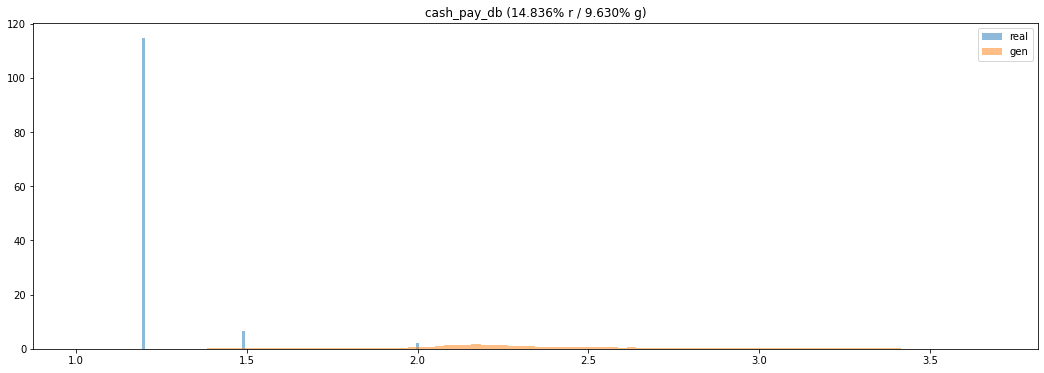

Real:	mean is 1.22,	median is 1.19,	std is 0.12,	min is 1.19,	max is 2.00,	log_abs_mean is 0.35,
Gen:	mean is 2.35,	median is 2.27,	std is 0.47,	min is 1.01,	max is 3.68,	log_abs_mean is 0.52,
bank_db_hh 4


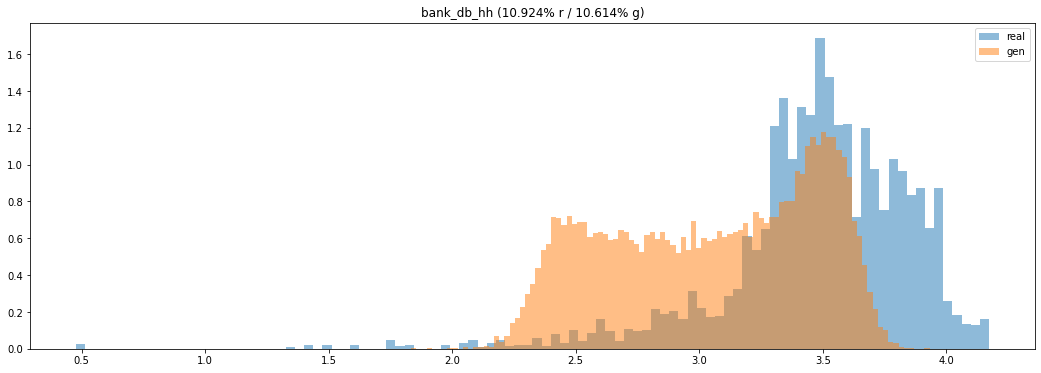

Real:	mean is 3.48,	median is 3.51,	std is 0.39,	min is 0.48,	max is 4.17,	log_abs_mean is 0.65,
Gen:	mean is 3.06,	median is 3.11,	std is 0.42,	min is 1.83,	max is 3.93,	log_abs_mean is 0.61,
bank_db 5


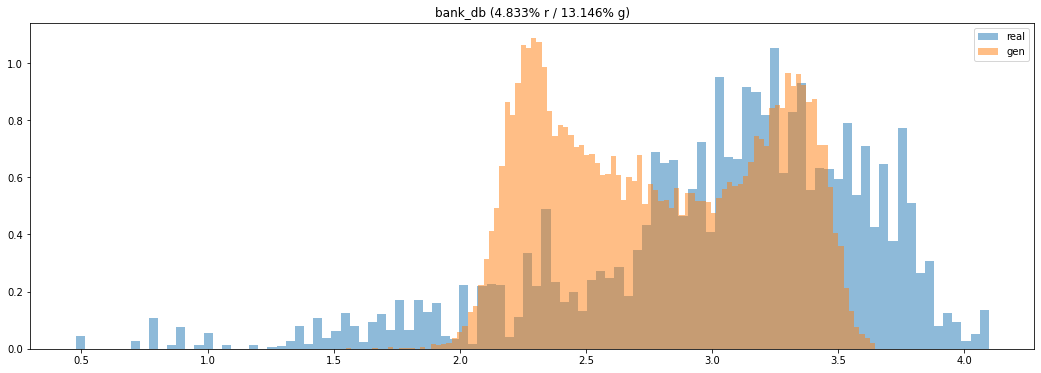

Real:	mean is 3.02,	median is 3.15,	std is 0.61,	min is 0.48,	max is 4.10,	log_abs_mean is 0.60,
Gen:	mean is 2.79,	median is 2.77,	std is 0.44,	min is 1.55,	max is 3.65,	log_abs_mean is 0.58,


In [14]:
def describe(x):
    fns = ["mean", "median", "std", "min", "max"]
    for fn in fns:
        val = eval(f"np.{fn}(x)")
        print(f"{fn} is {val:.2f},", end="\t")
        
    fn = "log_abs_mean" 
    val = np.mean(np.log10(np.abs(x)+1.))
    print(f"{fn} is {val:.2f},")

nshow = 20
real_vcs = real_df["tcode"].value_counts()


gen_vcs = gen_df["tcode"].value_counts()

tcode_counts = pd.merge(real_vcs.reset_index(), gen_vcs.reset_index(), on='index', how="outer", suffixes=("_real", "_gen")).fillna(0)


tcode_counts["real_freq"] = tcode_counts["tcode_real"] / sum(tcode_counts["tcode_real"])
tcode_counts["gen_freq"] = tcode_counts["tcode_gen"] / sum(tcode_counts["tcode_gen"])


plt.figure(figsize=(18, 6))
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="real") 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="gen")

for item in fig.get_xticklabels():
  item.set_rotation(45)


plt.legend()

plt.show()   


ax, fig = plt.subplots(1,1, figsize=(18, 6))
plt.hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="real", density=True)
plt.hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="gen", density=True)
plt.legend()

plt.show()   

print("\n"*3)



for i, (tcode, count_r, count_g, real_freq, gen_freq) in tcode_counts.iterrows():
    print(tcode, i)
    plt.figure(figsize=(18,6))

    vals_r = np.log10(real_df[real_df["tcode"]==tcode]["amount"]+1)
    vals_g = np.log10(gen_df[gen_df["tcode"]==tcode]["amount"]+1)

    plt.hist(vals_r, bins=100, label="real", alpha=0.5, density=True)
    plt.hist(vals_g, bins=100, label="gen", alpha=0.5, density=True)
    plt.legend()

    plt.title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')
    plt.show()

    print("Real:", end="\t")
    describe(vals_r)
    print("Gen:", end="\t")
    describe(vals_g)

    if i > 4: break

## Setup

In [15]:



def compare_distributions(tables, labels):
    
    # fig, ax = plt.subplots(1, 3, )

    # bars = ["tcode"]
    width = 0.25
    bins = 50
    eps = 1

    col = "tcode"
    uniq = real_df[col].unique()

    plt_dp = True
    for t in tables:
        if "days_passed" not in t: plt_dp = False
                
                
    if plt_dp:
        fig, ax = plt.subplots(1,4, figsize=(20,5))
    else:
        fig, ax = plt.subplots(1,3, figsize=(18,5))

    for t_i, (table, plt_lbl) in enumerate(zip(tables, labels)):

        counts = []
        lbls = []

        for j, val in enumerate(uniq):

            l = sum(table[col] == val)
            counts.append(l)
            lbls.append(val)

    #     for count, lbl in zip(counts, lbls):

        x = np.arange(len(lbls)) + t_i*width # the label locations
        ps = [x/sum(counts) for x in counts]
        rects1 = ax[0].bar(x - width/2, ps, width, align="edge", label=plt_lbl)


        ax[0].set_xticks(x)
        ax[0].set_xticklabels(lbls, rotation=75)
        ax[0].set_title("Tcode Frequency")


        ax[1].hist(table["amount"], bins=bins, density=True, alpha=0.5, label=plt_lbl)
        ax[1].set_title("Amounts Distribution")

        log_amts = table["amount"]+eps
        log_amts[log_amts<eps] = eps
        
        ax[2].hist(np.log10(log_amts), bins=bins, density=True, alpha=0.5, label=plt_lbl)
        ax[2].set_title("Log Amounts Distribution")
        
        if plt_dp:
            ax[3].hist(table["days_passed"], bins=50, range=(0,50), label=plt_lbl, alpha=0.5, density=True)
            ax[3].set_title("Days passed Distribution (<50)")
          

    for a in ax:
        a.legend()

    plt.show()
    
    

def plot_time_heatmap(df, log = False, eps = 1., showbig=False, show_by_month = True, print_info = False):

    rows = end.year - start.year +1
    cols = 365

    hm = np.zeros((rows, cols))
    leap_year_trs = 0.
    past_end_trs = 0.
    
    
    if not "datetime" in df:
#         print()
        df["datetime"] = parse_date(df["date"])
        

    for date in df["datetime"]:
        r = date.year - start.year

        try:
            c = datetime.date(1993, date.month, date.day) - datetime.date(1993, 1, 1)  # treat all years as non-leap
            c = c.days

            hm[r,c] += 1.
        except:
            if date.day == 29 and date.month == 2:
                leap_year_trs += 1
            elif date.year > end.year:
                past_end_trs += 1
            else:
                raise Exception(f"Failed with: {date}")
            
    if log:
        hm = np.log10(hm + eps)
 
    if print_info:
        print(f"{leap_year_trs} on Feb 29th")
        print(f"{past_end_trs} past 1998")
        
    if showbig:
        plt.figure(figsize=(20,5))
        plt.matshow(hm, fignum=1, aspect='auto') 
        plt.show()
    
    if not show_by_month: 
        return hm
    
    r = 4
    c = 3

    fig, ax = plt.subplots(r, c, figsize=(18, 8))

    start_i = 0

    for month in range(1, 13):

        end_i = start_i + calendar.monthrange(1, month)[1] # non-leap year

        ax[(month-1)//c, (month-1)%c].matshow(hm[:, start_i:end_i], aspect="auto")
        ax[(month-1)//c, (month-1)%c].set_title(calendar.month_name[month])
        start_i = end_i


    plt.tight_layout()
    plt.show()    
    
    return hm


def plt_tr_density_by_time(hms, labels):
    
    plt.figure(figsize=(18,5))  
    
    for t_i, (hm, plt_lbl) in enumerate(zip(hms, labels)):
        
        plt.plot(np.sum(hm, axis=0)/np.sum(hm), label=plt_lbl)

 

start, end = real_df["datetime"].min().date(), real_df["datetime"].max().date()
print("start, end = ", start, end)
ALL_DAYS = [start + datetime.timedelta(i) for i in range((end - start).days)]

start, end =  1993-01-01 1998-12-31


# Compare Times

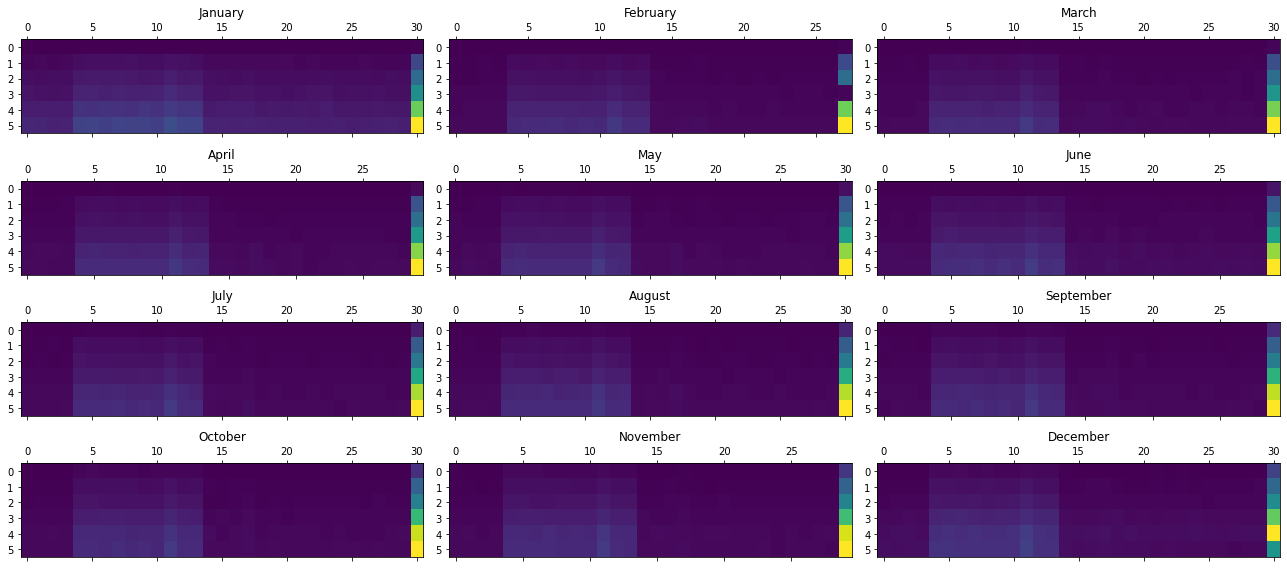

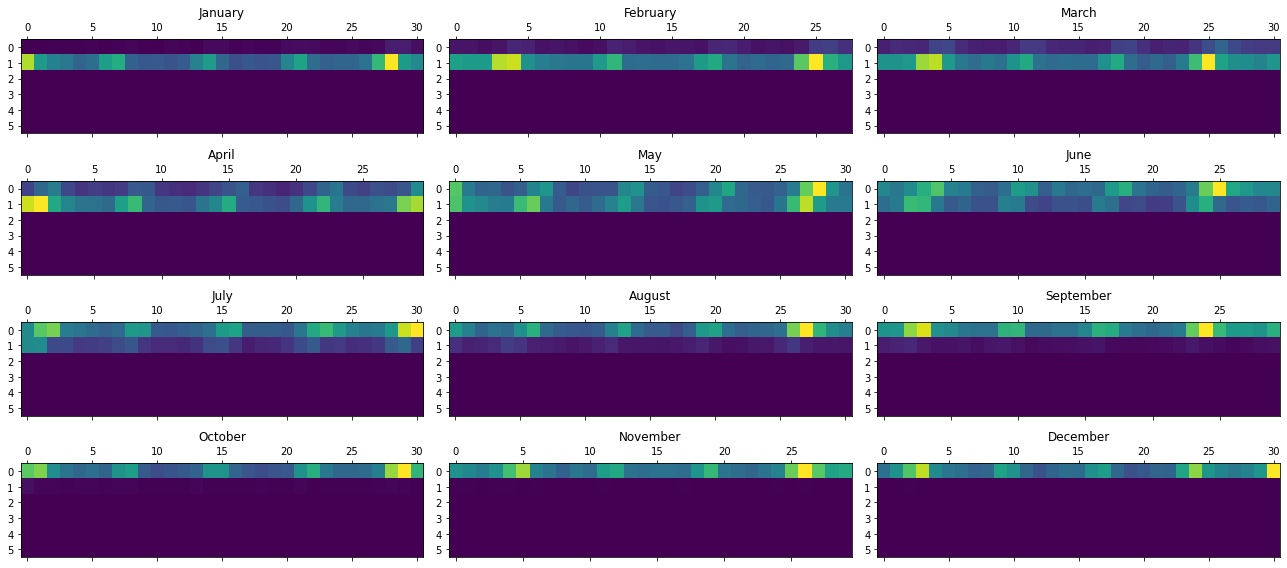

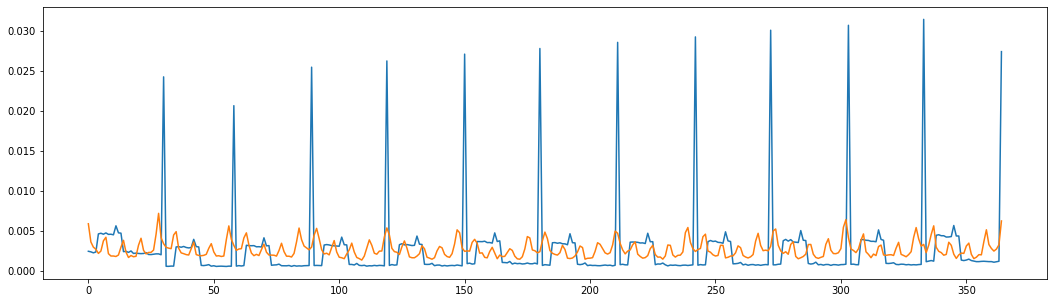

In [16]:
hm_real = plot_time_heatmap(real_df)
# compare_distributions(tables= [real_df, gen_df], labels=["Real", "Gen"])
hm_gen = plot_time_heatmap(gen_df)
plt_tr_density_by_time([hm_real, hm_gen], ["Real", "Gen"])
plt.show()

# PCA

## Setup

required fields = ["tcode", "amount", "account_id", "days_passed", "age" ] 

In [17]:
len(real_df)

582567

In [18]:
real_df

,index,Unnamed: 0,column_a,account_id,date,type,operation,amount,balance,k_symbol,age,tcode,datetime,month,day,dow,year,td,days_passed
0,239,239,450,2,930226,CREDIT,CREDIT IN CASH,1100.0,1100.0,NaN,54,cash_cr,1993-02-26,2,26,4,1993,0.0,0.0
1,240,240,809,2,930312,CREDIT,COLLECTION FROM ANOTHER BANK,20236.0,21336.0,NaN,54,bank_cr,1993-03-12,3,12,4,1993,14.0,14.0
2,241,241,1032,2,930328,CREDIT,CREDIT IN CASH,3700.0,25036.0,NaN,54,cash_cr,1993-03-28,3,28,6,1993,16.0,16.0
3,242,242,1241,2,930331,CREDIT,NaN,13.5,25049.5,INTEREST CREDITED,54,interest_cr,1993-03-31,3,31,2,1993,3.0,3.0
4,243,243,1563,2,930412,CREDIT,COLLECTION FROM ANOTHER BANK,20236.0,45285.5,NaN,54,bank_cr,1993-04-12,4,12,0,1993,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582562,1056062,1056062,1038058,11362,981208,DEBIT,REMITTANCE TO ANOTHER BANK,56.0,51419.8,,37,bank_db,1998-12-08,12,8,1,1998,1.0,1.0
582563,1056063,1056063,1040575,11362,981210,DEBIT,REMITTANCE TO ANOTHER BANK,4780.0,46639.8,HOUSEHOLD,37,bank_db_hh,1998-12-10,12,10,3,1998,2.0,2.0
582564,1056064,1056064,1043000,11362,981212,DEBIT,REMITTANCE TO ANOTHER BANK,5392.0,41247.8,LOAN PAYMENT,37,loan_db,1998-12-12,12,12,5,1998,2.0,2.0
582565,1056065,1056065,1048553,11362,981219,DEBIT,CASH WITHDRAWAL,2880.0,38367.8,NaN,37,cash_db_nan,1998-12-19,12,19,5,1998,7.0,7.0


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
from my_lib.encoding import load_data_encoder
data_encoder = load_data_encoder(ds_suffix)

tcode_nums_r = real_df["tcode"].apply(lambda x: data_encoder.TCODE_TO_NUM[x])
tcode_nums_g = gen_df["tcode_nums"]

In [25]:
oh_r = tf.one_hot(tcode_nums_r, depth=data_encoder.n_tcodes)
oh_g = tf.one_hot(tcode_nums_g, depth=data_encoder.n_tcodes)

In [26]:
data_r = np.concatenate([np.array(real_df["amount"])[:,None], oh_r.numpy()], axis=1)
data_r.shape

(582567, 17)

In [27]:
data_g = np.concatenate([np.array(gen_df["amount"])[:,None], oh_g.numpy()], axis=1)
data_g.shape

(120000, 17)

In [28]:
tcode_names = [data_encoder.NUM_TO_TCODE[i] for i in range(data_encoder.n_tcodes)]

In [29]:
real_trans_df = pd.DataFrame.from_records(data_r, columns=["amount"] + tcode_names)
real_trans_df["account_id"] = real_df["account_id"]
real_trans_df["age"] = real_df["age"]
real_trans_df["log_amount"] = np.log10(real_trans_df["amount"]+1)

AMOUNT_SCALE = real_trans_df["amount"].std()
LOG_AMOUNT_SCALE = real_trans_df["log_amount"].std()

real_trans_df["amount_sc"] = real_trans_df["amount"] / AMOUNT_SCALE
real_trans_df["log_amount_sc"] = real_trans_df["log_amount"] / LOG_AMOUNT_SCALE

real_trans_df["days_passed"] = real_df["days_passed"]

real_trans_df

,amount,cash_cr,bank_cr,interest_cr,cash_db_nan,cash_pay_db,bank_db_hh,loan_db,bank_db,bank_db_in,...,cash_db_hh,sanction_db,cash_db,cash_db_in,account_id,age,log_amount,amount_sc,log_amount_sc,days_passed
0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,54,3.041787,0.117623,2.875105,0.0
1,20236.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,54,4.306146,2.163843,4.070180,14.0
2,3700.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,54,3.568319,0.395642,3.372784,16.0
3,13.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,54,1.161368,0.001444,1.097728,3.0
4,20236.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,54,4.306146,2.163843,4.070180,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582562,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,11362,37,1.755875,0.005988,1.659657,1.0
582563,4780.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11362,37,3.679519,0.511127,3.477890,2.0
582564,5392.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11362,37,3.731830,0.576568,3.527335,2.0
582565,2880.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11362,37,3.459543,0.307959,3.269969,7.0


In [30]:
gen_trans_df = pd.DataFrame.from_records(data_g, columns=["amount"] + tcode_names)
gen_trans_df["age"] = gen_df["age"]
gen_trans_df["account_id"] = gen_df["account_id"]
gen_trans_df["log_amount"] = np.log10(gen_trans_df["amount"]+1)

gen_trans_df["amount_sc"] = gen_trans_df["amount"] / AMOUNT_SCALE
gen_trans_df["log_amount_sc"] = gen_trans_df["log_amount"] / LOG_AMOUNT_SCALE

gen_trans_df["days_passed"] = gen_df["days_passed"]

gen_trans_df

,amount,cash_cr,bank_cr,interest_cr,cash_db_nan,cash_pay_db,bank_db_hh,loan_db,bank_db,bank_db_in,...,cash_db_hh,sanction_db,cash_db,cash_db_in,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,133.389999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,0,2.128367,0.014263,2.011738,2
1,635.330017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,0,2.803682,0.067936,2.650047,4
2,1299.930054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,0,3.114254,0.139002,2.943600,4
3,1794.300049,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,0,3.254137,0.191865,3.075818,4
4,6470.669922,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,0,3.811016,0.691911,3.602182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,756.359985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71,1499,2.879302,0.080878,2.721524,2
119996,160.800003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71,1499,2.208979,0.017194,2.087932,2
119997,898.440002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71,1499,2.953972,0.096071,2.792102,2
119998,581.700012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71,1499,2.765445,0.062201,2.613905,3


## Transactions

### Unscaled - tcodes, amount, td

In [31]:
n_pts = 10_000 # dont plot all transactions
cols = tcode_names + ["amount", "days_passed"]

In [32]:
pca = PCA()

tr_real_pc = pca.fit_transform(real_trans_df[cols])
tr_gen_pc = pca.transform(gen_trans_df[cols])

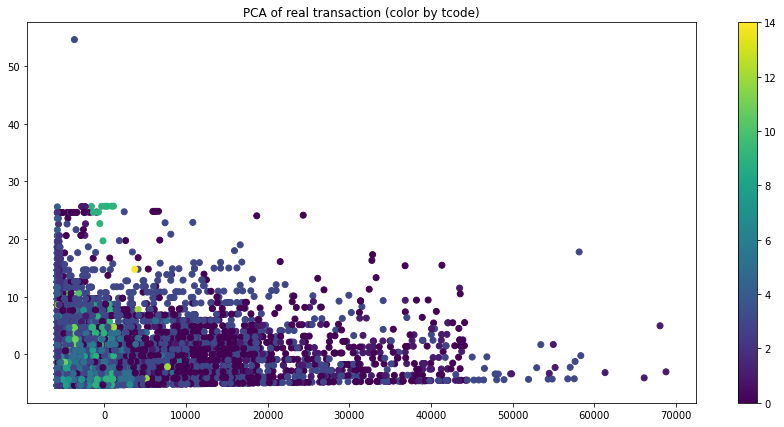

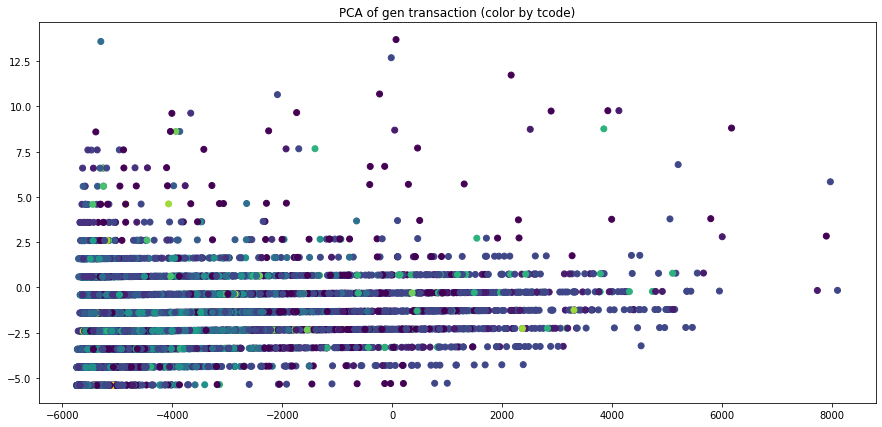

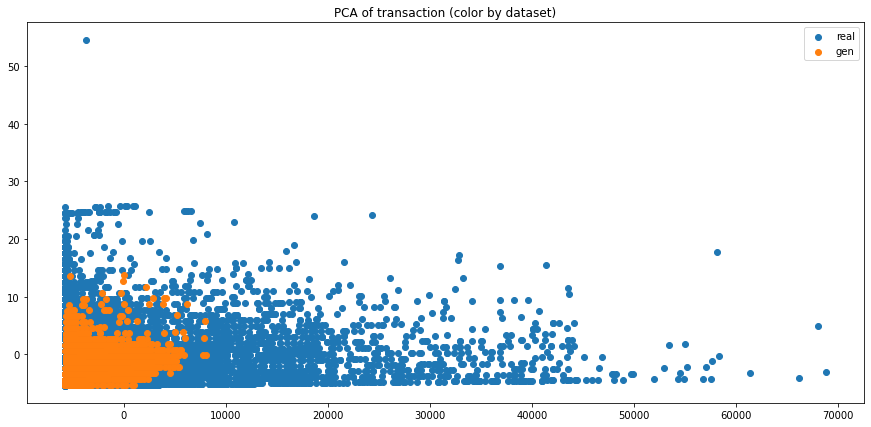

In [33]:
inds_r = np.random.choice(data_r.shape[0], size=n_pts, replace=False)

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], c=tcode_nums_r[inds_r])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


inds_g = np.random.choice(data_g.shape[0], size=n_pts, replace=False)

plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], c=tcode_nums_g[inds_g])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], label="real")
plt.scatter(tr_gen_pc[inds_g,0],  tr_gen_pc[inds_g, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

### Unscaled - tcodes, amount (no td)

In [34]:
n_pts = 10000
cols = tcode_names + ["amount"]


pca = PCA()

tr_real_pc = pca.fit_transform(real_trans_df[cols])
tr_gen_pc = pca.transform(gen_trans_df[cols])


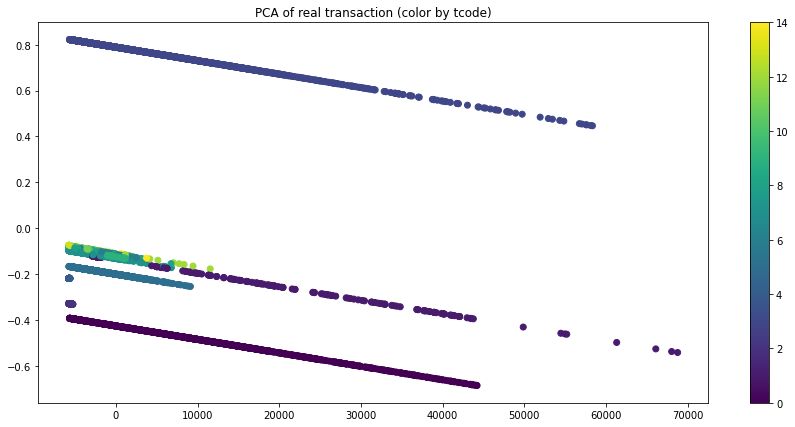

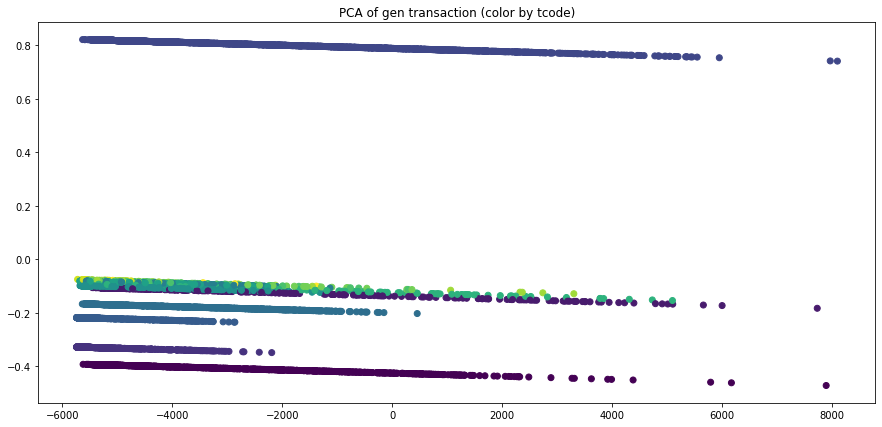

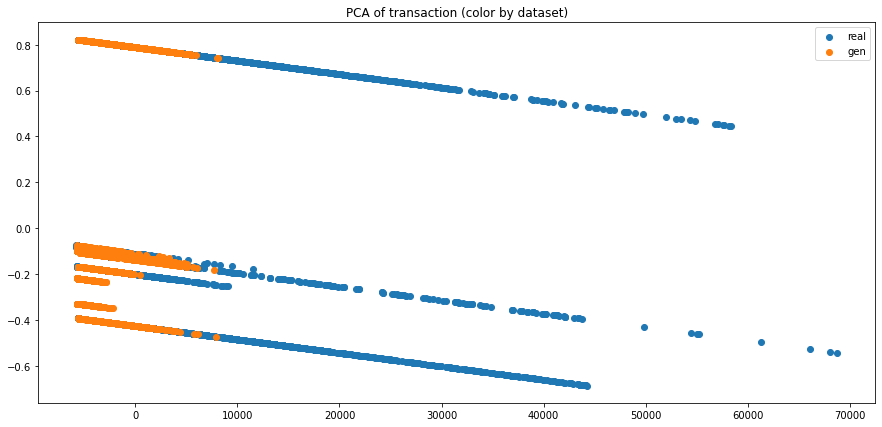

In [35]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], c=tcode_nums_r[inds_r])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], c=tcode_nums_g[inds_g])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], label="real")
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

### Scaled - tcodes, amount, td

In [36]:
cols = tcode_names + ["amount", "days_passed"]


pca = PCA()

scaler = StandardScaler()

tr_real_pc = pca.fit_transform(
    scaler.fit_transform(real_trans_df[cols])
)

tr_gen_pc = pca.transform(
    scaler.transform(gen_trans_df[cols])
)



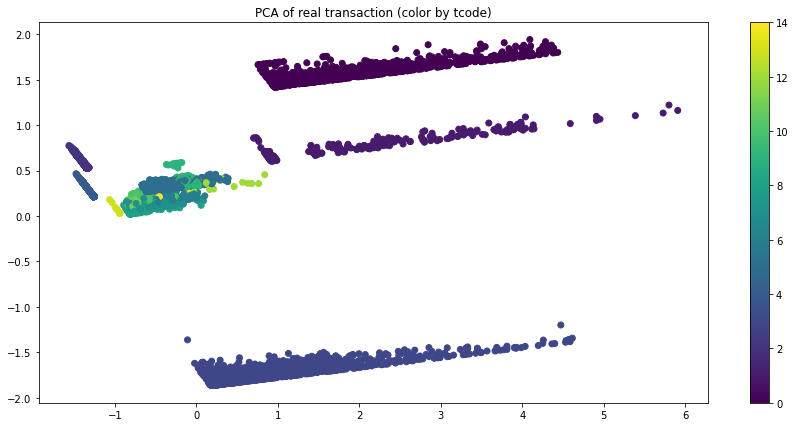

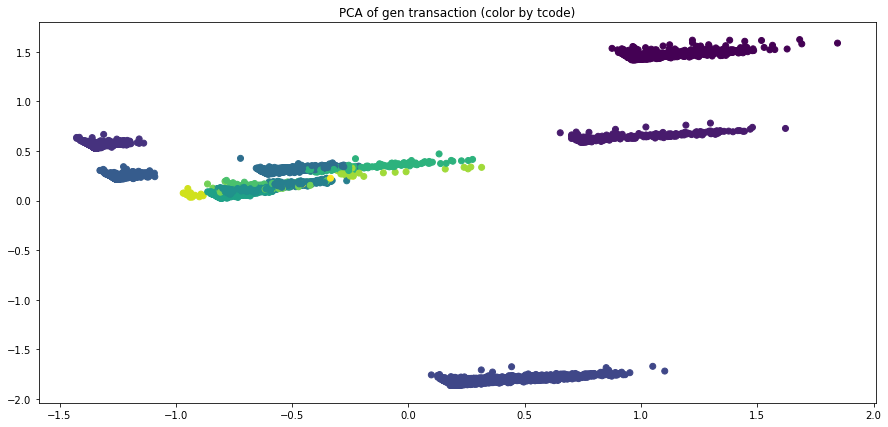

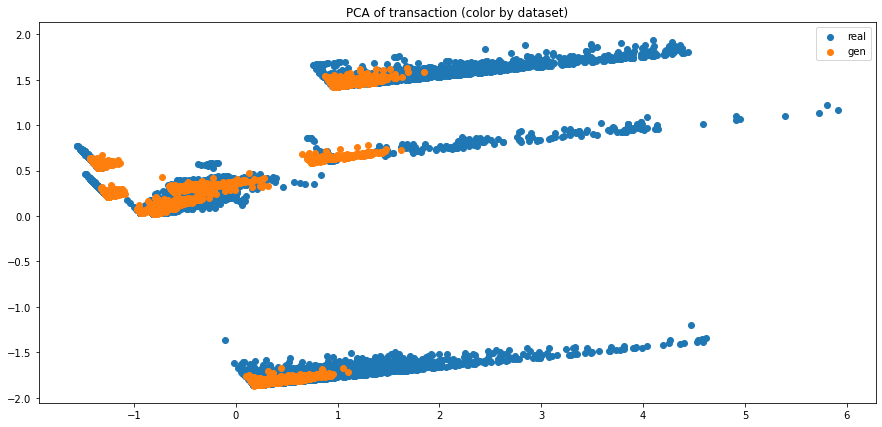

In [37]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], c=tcode_nums_r[inds_r])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], c=tcode_nums_g[inds_g])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], label="real")
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

### Scaled - tcodes, amount, (no td)

In [38]:
n_pts = 10000
cols = tcode_names + ["amount"]


pca = PCA()

scaler = StandardScaler()

tr_real_pc = pca.fit_transform(
    scaler.fit_transform(real_trans_df[cols])
)

tr_gen_pc = pca.transform(
    scaler.transform(gen_trans_df[cols])
)


inds = np.random.choice(data_r.shape[0], size=n_pts, replace=False)
inds

array([123612,  55078, 458038, ..., 349727, 560889, 347746])

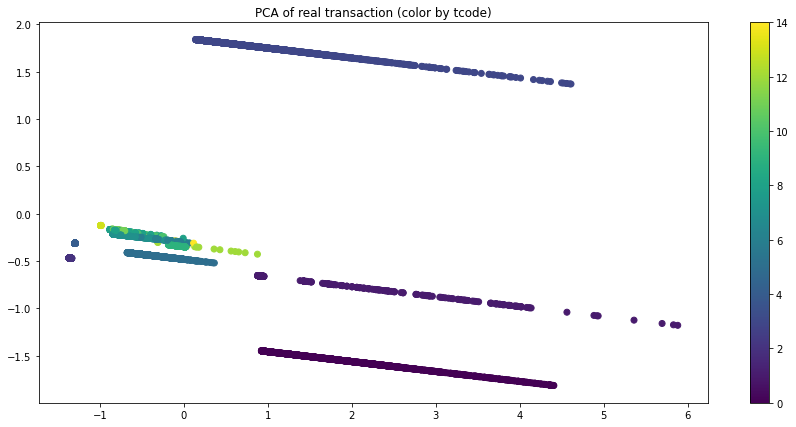

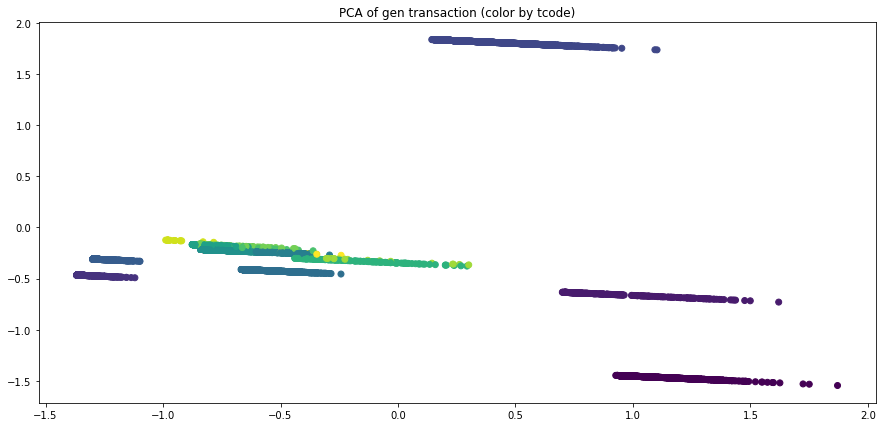

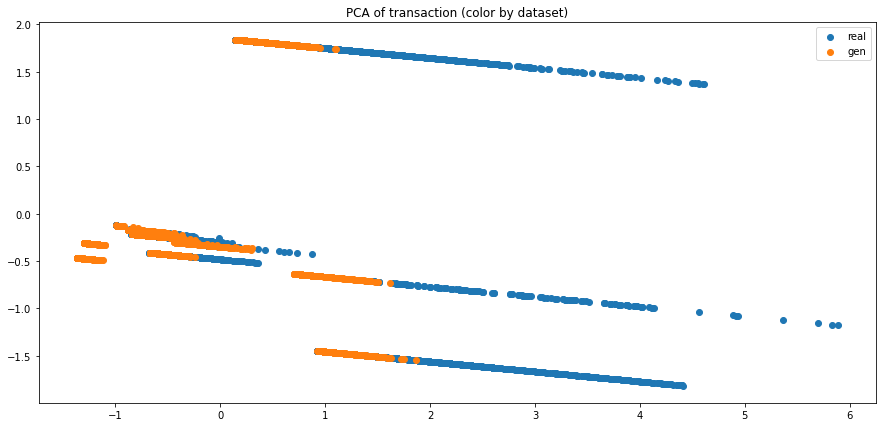

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], c=tcode_nums_r[inds_r])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], c=tcode_nums_g[inds_g])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds_r,0], tr_real_pc[inds_r, 1], label="real")
plt.scatter(tr_gen_pc[inds_g,0], tr_gen_pc[inds_g, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

## Seqs

### Setup

In [40]:
real_seq_df = real_trans_df.groupby("account_id").mean()
real_seq_df

,amount,cash_cr,bank_cr,interest_cr,cash_db_nan,cash_pay_db,bank_db_hh,loan_db,bank_db,bank_db_in,...,bank_db_nan,cash_db_hh,sanction_db,cash_db,cash_db_in,age,log_amount,amount_sc,log_amount_sc,days_passed
account_id,,,,,,,,,,,,,,,,,,,,,
2,6593.052929,0.025105,0.146444,0.146444,0.359833,0.135983,0.135983,0.050209,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,54,3.215073,0.704997,3.038895,4.464435
3,2521.553846,0.239316,0.000000,0.153846,0.162393,0.111111,0.111111,0.000000,0.111111,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.0,43,2.878155,0.269631,2.720439,4.632479
11,1387.634946,0.005376,0.209677,0.209677,0.204301,0.182796,0.000000,0.000000,0.000000,0.000000,...,0.188172,0.000000,0.000000,0.000000,0.0,57,2.594675,0.148380,2.452493,6.333333
12,2044.823585,0.009434,0.000000,0.169811,0.207547,0.141509,0.141509,0.000000,0.141509,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,81,2.737770,0.218654,2.587747,5.896226
14,6337.564516,0.217742,0.000000,0.201613,0.209677,0.161290,0.161290,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,57,3.102272,0.677678,2.932275,6.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,13987.599355,0.232258,0.000000,0.116129,0.354839,0.096774,0.096774,0.006452,0.096774,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,24,3.547274,1.495699,3.352892,3.470968
11320,6919.211813,0.189560,0.000000,0.357143,0.269231,0.162088,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.021978,0.000000,0.0,25,2.778524,0.739874,2.626267,5.552198
11325,6566.440268,0.127517,0.000000,0.261745,0.208054,0.134228,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100671,0.067114,0.100671,0.0,29,2.751113,0.702152,2.600358,5.208054


In [41]:
gen_seq_df = gen_trans_df.groupby("account_id").mean()
gen_seq_df

,amount,cash_cr,bank_cr,interest_cr,cash_db_nan,cash_pay_db,bank_db_hh,loan_db,bank_db,bank_db_in,...,bank_db_nan,cash_db_hh,sanction_db,cash_db,cash_db_in,age,log_amount,amount_sc,log_amount_sc,days_passed
account_id,,,,,,,,,,,,,,,,,,,,,
0,1649.135014,0.1125,0.0375,0.1125,0.2875,0.0875,0.0750,0.0125,0.1750,0.0750,...,0.0000,0.0,0.0,0.0000,0.0,38.0,2.940120,0.176343,2.779008,3.5125
1,1437.578496,0.0875,0.0250,0.1250,0.3125,0.1125,0.1000,0.0375,0.1625,0.0250,...,0.0000,0.0,0.0,0.0000,0.0,43.0,2.909027,0.153721,2.749620,3.2125
2,1390.841619,0.1000,0.0250,0.1000,0.2750,0.1375,0.0625,0.0250,0.2000,0.0500,...,0.0125,0.0,0.0,0.0000,0.0,66.0,2.895751,0.148723,2.737071,3.2500
3,1709.395499,0.1000,0.0625,0.0625,0.3125,0.1125,0.1375,0.0250,0.1125,0.0375,...,0.0000,0.0,0.0,0.0000,0.0,27.0,2.938769,0.182786,2.777732,4.0125
4,1627.546139,0.1125,0.0125,0.1125,0.3000,0.0875,0.1500,0.0125,0.1625,0.0250,...,0.0000,0.0,0.0,0.0125,0.0,71.0,2.918077,0.174034,2.758174,3.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1717.841252,0.1500,0.0250,0.1250,0.3375,0.1125,0.0875,0.0375,0.0750,0.0125,...,0.0000,0.0,0.0,0.0000,0.0,42.0,2.954215,0.183689,2.792331,3.3750
1496,1668.035880,0.1000,0.0125,0.1250,0.3250,0.1125,0.1250,0.0000,0.1375,0.0250,...,0.0125,0.0,0.0,0.0000,0.0,34.0,2.929787,0.178364,2.769242,2.9625
1497,1906.624491,0.1625,0.0375,0.0750,0.2875,0.1000,0.0875,0.0250,0.1375,0.0750,...,0.0000,0.0,0.0,0.0000,0.0,69.0,2.968574,0.203876,2.805903,3.1375


### Unscaled Seqs

In [42]:
cols = tcode_names + ["amount"]

pca = PCA()

seqs_r_pc = pca.fit_transform(real_seq_df[cols])
seqs_g_pc = pca.transform(gen_seq_df[cols])

seqs_r_pc.shape, seqs_g_pc.shape

((2500, 17), (1500, 17))

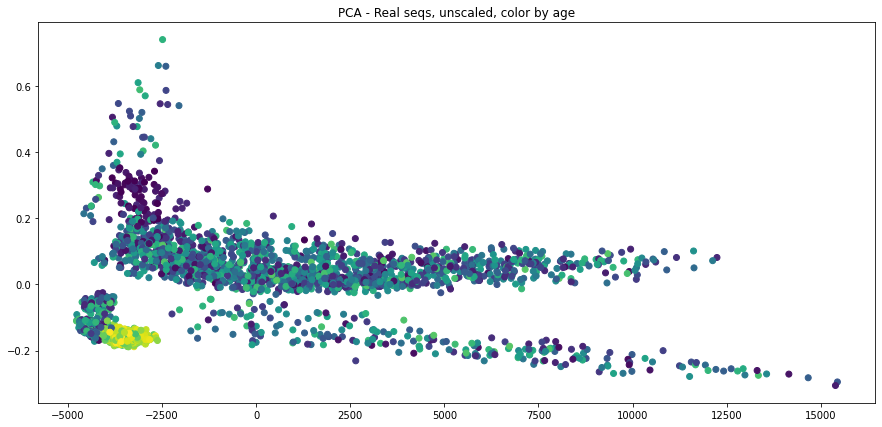

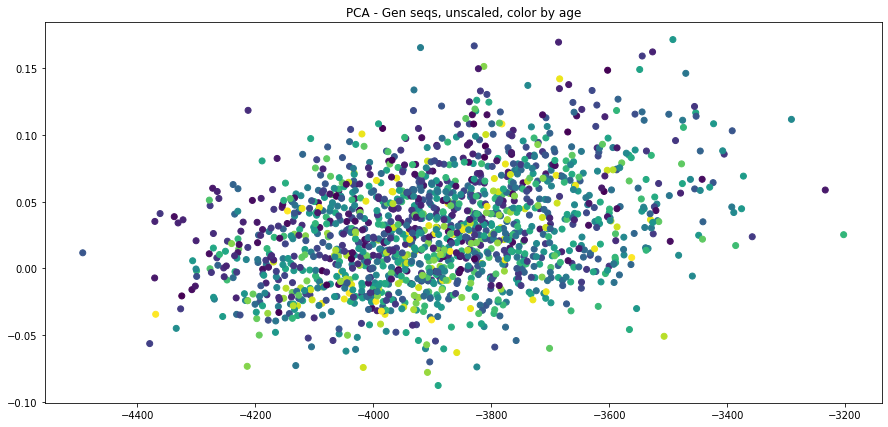

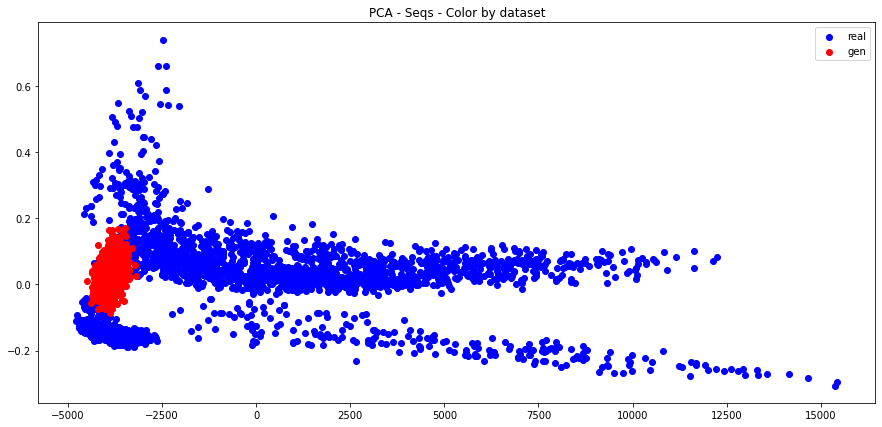

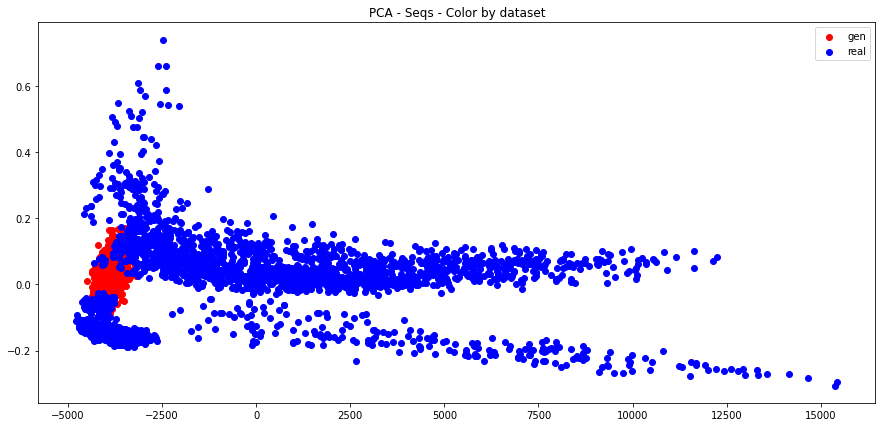

<AxesSubplot:>

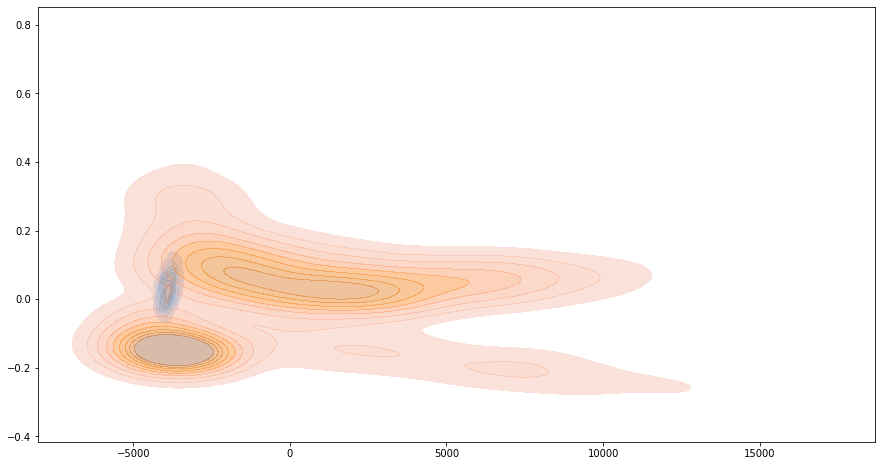

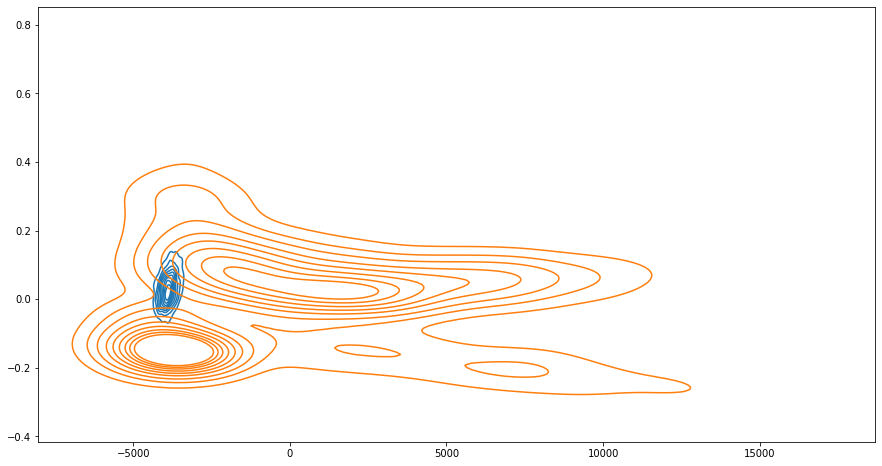

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(seqs_r_pc[:,0], seqs_r_pc[:, 1], c=real_seq_df["age"])
plt.title("PCA - Real seqs, unscaled, color by age")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(seqs_g_pc[:,0], seqs_g_pc[:, 1], c=gen_seq_df["age"])
plt.title("PCA - Gen seqs, unscaled, color by age")
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Color by dataset")
plt.scatter(seqs_r_pc[:,0], seqs_r_pc[:, 1], label="real", c="b")
plt.scatter(seqs_g_pc[:,0], seqs_g_pc[:, 1], label="gen", c="r")
plt.legend()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Color by dataset")
plt.scatter(seqs_g_pc[:,0], seqs_g_pc[:, 1], label="gen", c="r")
plt.scatter(seqs_r_pc[:,0], seqs_r_pc[:, 1], label="real", c="b")
plt.legend()
plt.show()



plt.figure(figsize=(15, 8))
sns.kdeplot(x=seqs_g_pc[:,0], y=seqs_g_pc[:,1], label= "gen", shade=True, alpha=0.4)
sns.kdeplot(x=seqs_r_pc[:,0], y=seqs_r_pc[:,1], label= "real", shade=True, alpha=0.4)

plt.figure(figsize=(15, 8))
sns.kdeplot(x=seqs_g_pc[:,0], y=seqs_g_pc[:,1], label= "gen")
sns.kdeplot(x=seqs_r_pc[:,0], y=seqs_r_pc[:,1], label= "real")

### Scaled Seqs (0 mean, 1 sd) (no td)

In [44]:
cols = tcode_names + ["amount"]

scaler = StandardScaler()
scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(gen_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)
scaled_seqs_g_pc = pca.transform(scaled_seqs_g)

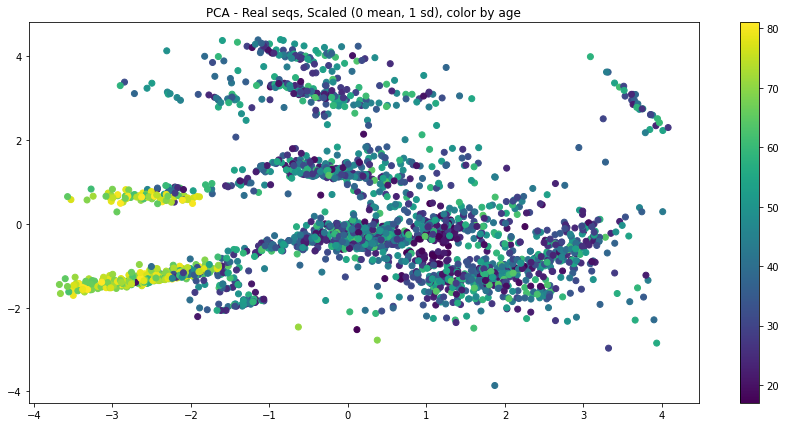

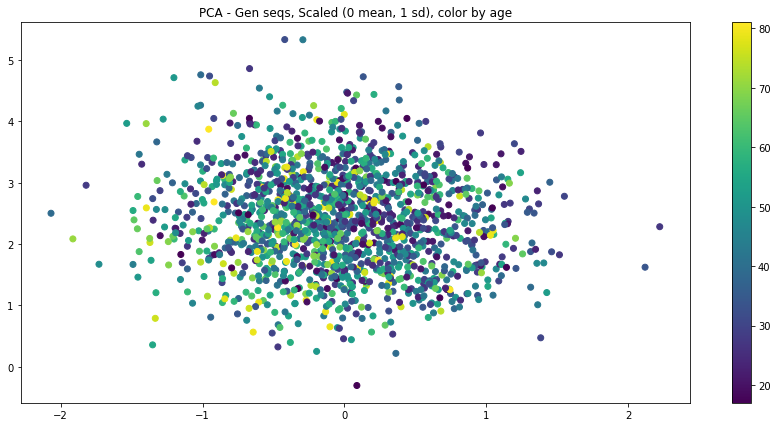

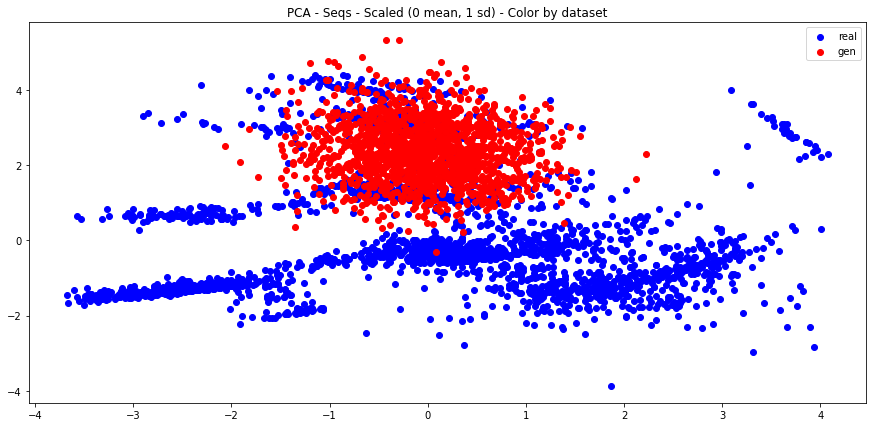

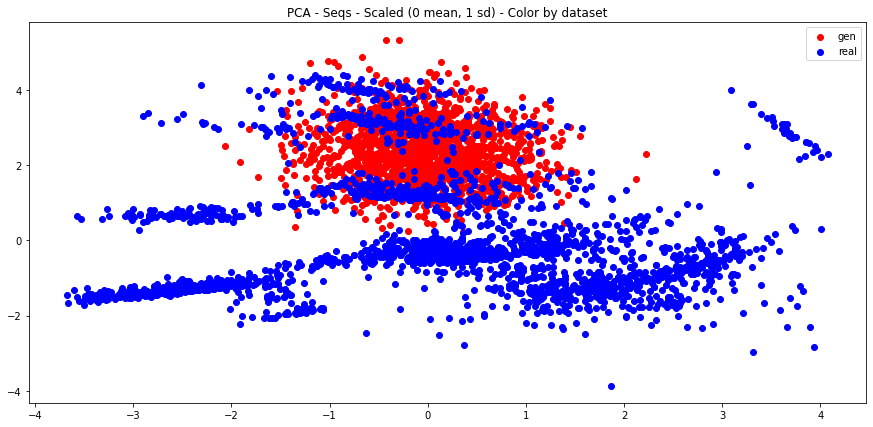

In [45]:
plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], c=real_seq_df["age"])
plt.title("PCA - Real seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], c=gen_seq_df["age"])
plt.title("PCA - Gen seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.legend()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.legend()
plt.show()

In [46]:
df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "real"

pcs_scaled = pd.concat([df1, df2]).reset_index()

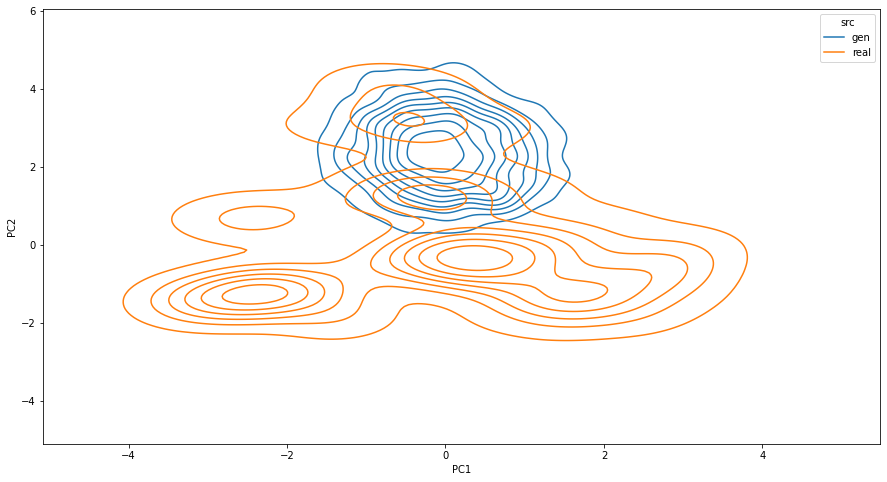

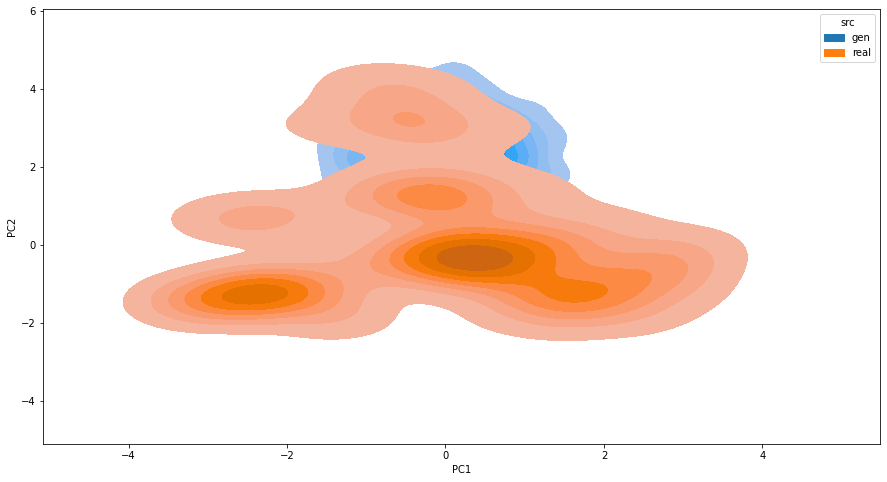

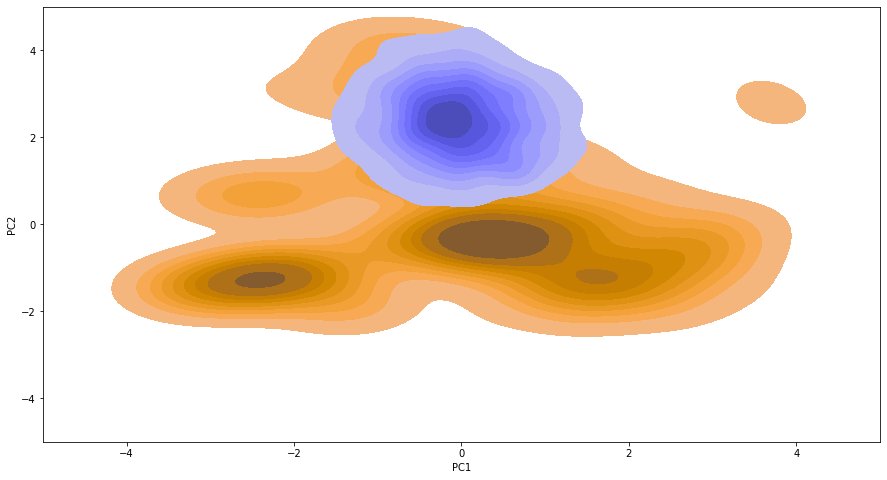

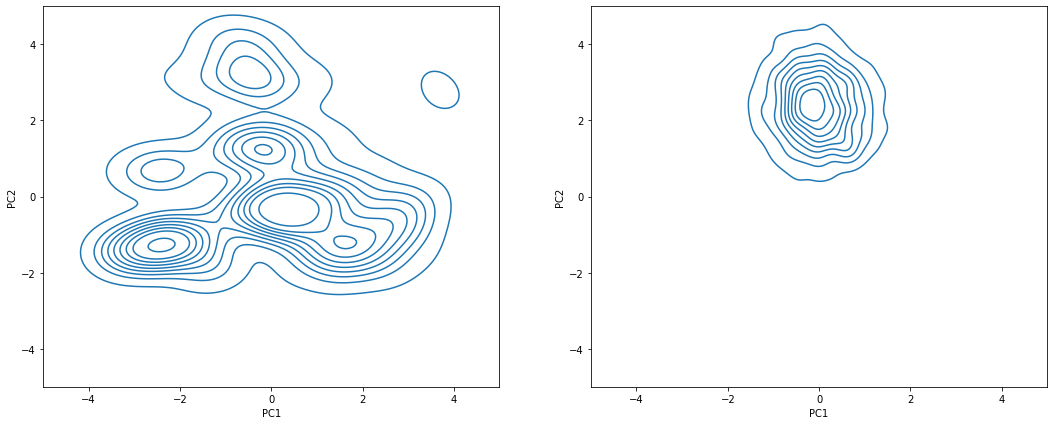

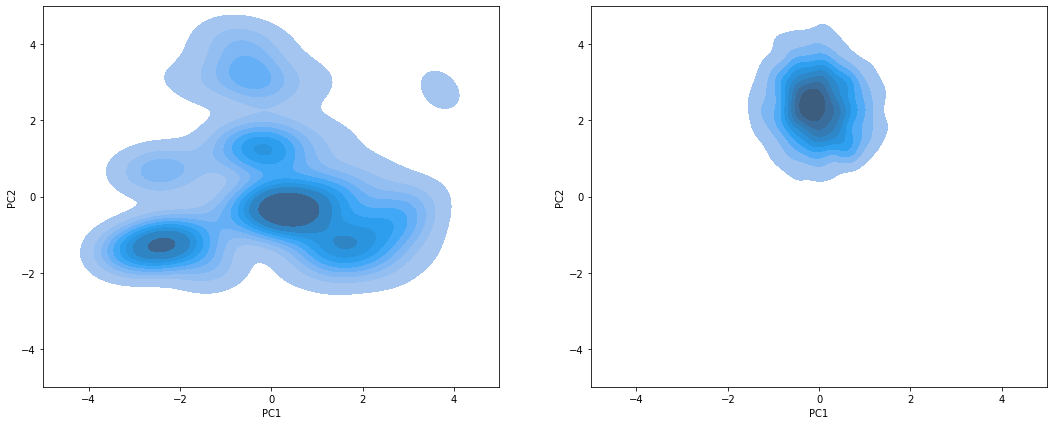

In [47]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src")

plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src", fill=True)

plt.figure(figsize=(15, 8))
plt.ylim([-5,5])
plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2", fill=True, color="orange")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2", fill=True, color="b")


fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1])

plt.show()

fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0], fill=True)
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1], fill=True)

plt.show()

### Scaled Seqs (0 mean, 1 sd) (with td)

In [48]:
cols = tcode_names + ["amount", "days_passed"]

scaler = StandardScaler()
scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(gen_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)
scaled_seqs_g_pc = pca.transform(scaled_seqs_g)

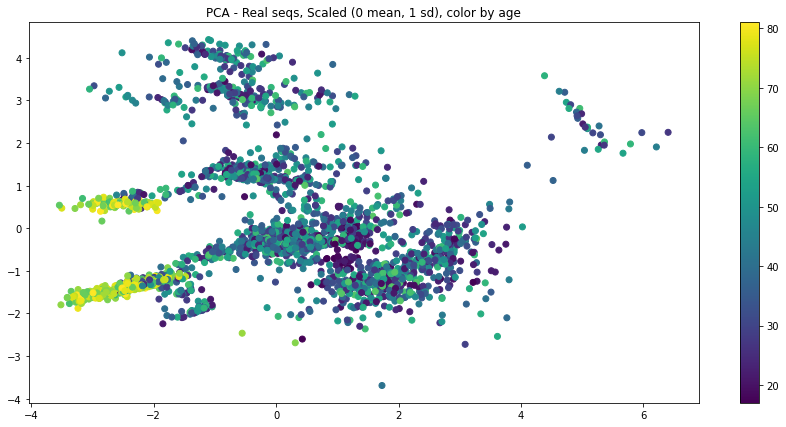

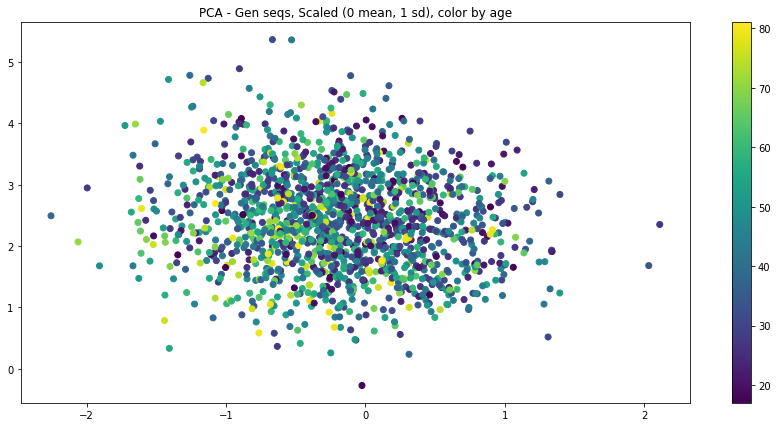

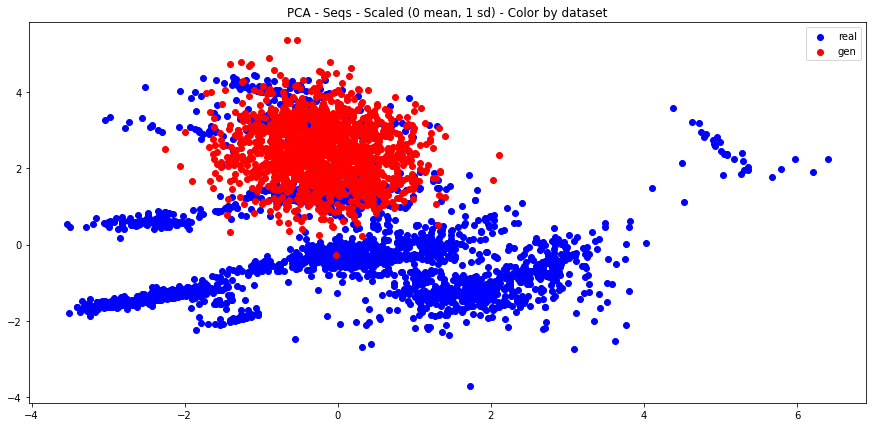

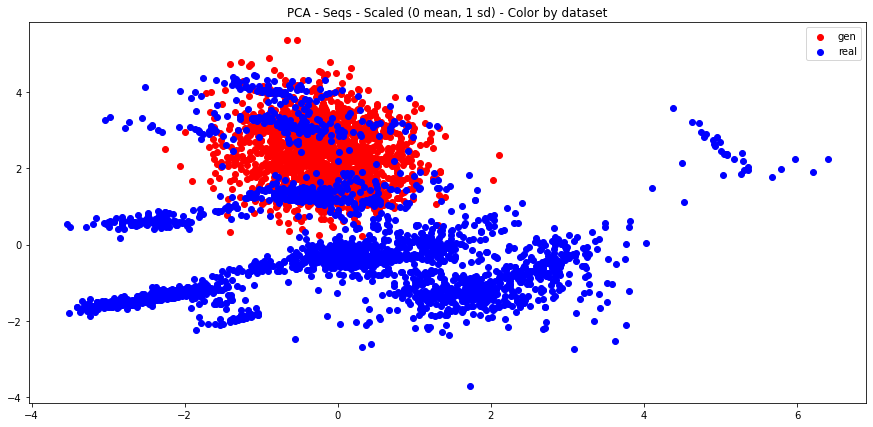

In [49]:
plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], c=real_seq_df["age"])
plt.title("PCA - Real seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], c=gen_seq_df["age"])
plt.title("PCA - Gen seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.legend()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.legend()
plt.show()

In [50]:
df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "real"

pcs_scaled = pd.concat([df1, df2]).reset_index()

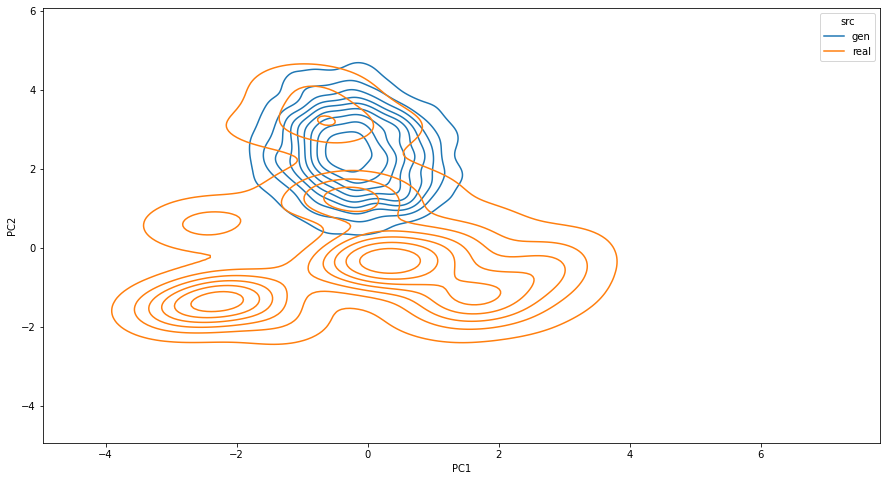

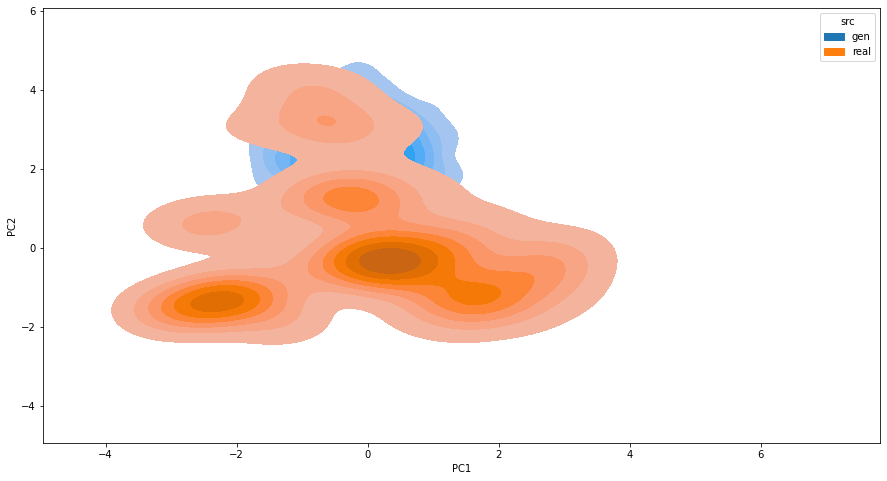

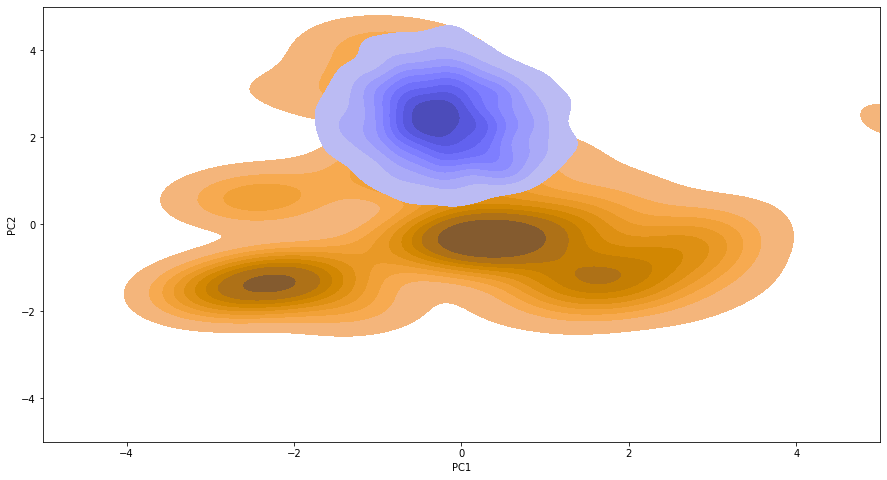

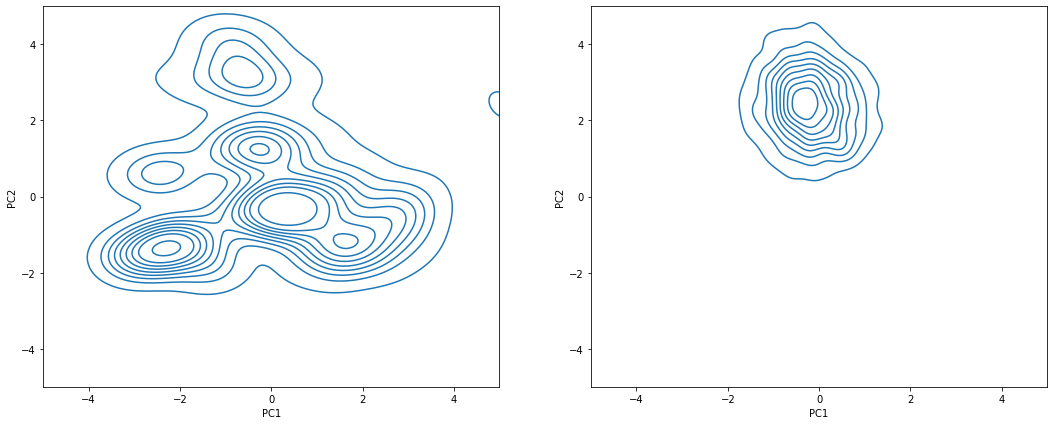

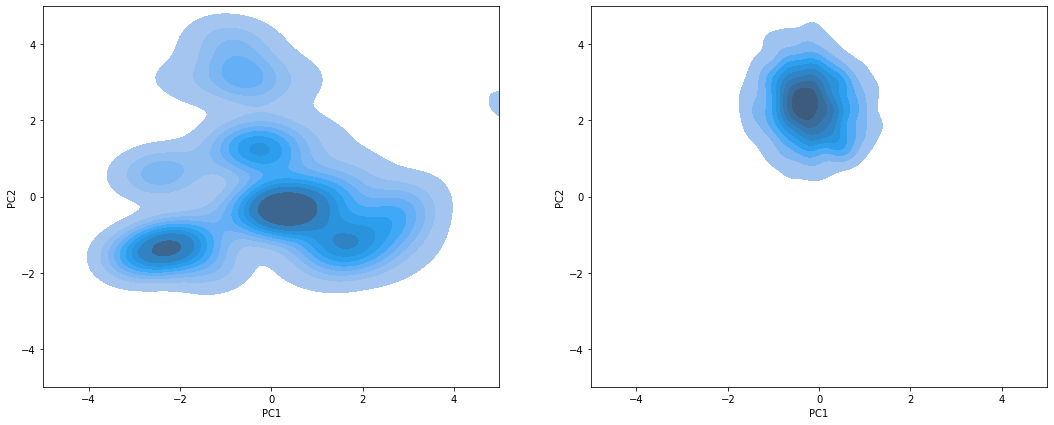

In [51]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src")

plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src", fill=True)

plt.figure(figsize=(15, 8))
plt.ylim([-5,5])
plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2", fill=True, color="orange")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2", fill=True, color="b")


fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1])

plt.show()

fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0], fill=True)
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1], fill=True)

plt.show()

## Estimate KL between PC distributions

In [52]:
from sklearn.neighbors import KernelDensity

In [53]:
P = KernelDensity().fit(pcs_scaled[pcs_scaled["src"]=="real"][["PC1", "PC2"]])
Q = KernelDensity().fit(pcs_scaled[pcs_scaled["src"]=="gen"][["PC1", "PC2"]])

In [54]:
# P - real
# Q - gen

class MixedKDE:
    def __init__(self, P, Q):
        self.P = P
        self.Q = Q
        
        
    def sample(self, n):
        n1 = int(n // 2)
        n2 = n - n1
        samples_p = self.P.sample(n1)
        samples_q = self.Q.sample(n2)
        
        return np.concatenate([samples_p, samples_q])
    
    
    def score_samples(self, samples):
        return (self.P.score_samples(samples) +
               self.Q.score_samples(samples)) / 2
    

# estimates KL(P||Q) with monte carlo sampling
# (How well Q does as an approximation of P )
def estimate_jsd_kde(P, Q, n=10_000):
    
    M = MixedKDE(P,Q)
    samples_r = P.sample(n)
    samples_g = Q.sample(n)
    
    KL_PM = estimate_kl_from_kde(P, M, n=n)
    KL_QM = estimate_kl_from_kde(Q, M, n=n)
    
    return np.mean(KL_PM + KL_PM)/2
    
    
    


# estimates KL(P||Q) with monte carlo sampling
# (How well Q does as an approximation of P )
def estimate_kl_from_kde(P, Q, n=10_000):
    samples_r = P.sample(n)
    logP_real = P.score_samples(samples_r)
    logQ_real = Q.score_samples(samples_r)
    
    return np.mean(logP_real - logQ_real)
    
    
    


In [55]:
estimates = [estimate_jsd_kde(P, Q, n=50_000) for _ in range(10)]

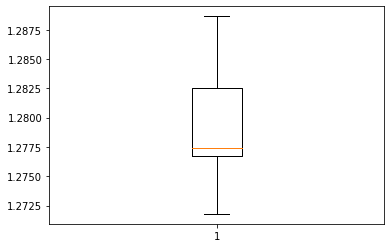

In [56]:
plt.boxplot(estimates)
plt.show()

In [57]:
estimates = [estimate_jsd_kde(P, Q, n=100_000) for _ in range(10)]

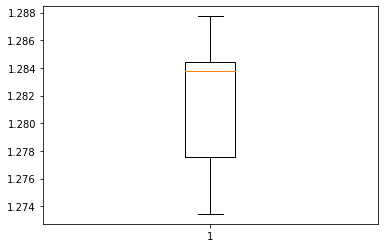

In [58]:
plt.boxplot(estimates)
plt.show()

# N-grams  
NOTE: If you are using a reduced version of the datasets, you might want to go back to the top and reload full datasets. The JSD esitmates as n gets larger suffer from curse of dimensionality

### Setup

In [59]:
import nltk
from nltk.util import ngrams

In [60]:
def create_ngramcount_df(df, n):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    df["freqs"] = df["counts"] / sum(df["counts"])

    df.reset_index(inplace=True)
            
    return df

In [61]:
from scipy.spatial import distance

def jensenshannon_diverg(p,q):
    return distance.jensenshannon(p,q, base=2) ** 2

### Specific N  

In [62]:
n = 4
real_ngrams = create_ngramcount_df(real_df, n)
gen_ngrams = create_ngramcount_df(gen_df, n)

In [63]:
combo_df = pd.merge(real_ngrams, gen_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
    "counts_x":"counts_real", "freqs_x":"freqs_real", "counts_y":"counts_gen", "freqs_y":"freqs_gen", "index":"ngram"
})
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen
0,"'cash_db_nan', 'cash_db_nan', 'interest_cr', '...",8211.0,0.014278,290.0,0.002511
1,"'cash_db_nan', 'cash_db_nan', 'cash_db_nan', '...",8108.0,0.014099,1365.0,0.011818
2,"'cash_db_nan', 'cash_db_nan', 'cash_pay_db', '...",7561.0,0.013148,161.0,0.001394
3,"'cash_db_nan', 'interest_cr', 'cash_pay_db', '...",6570.0,0.011425,174.0,0.001506
4,"'cash_db_nan', 'interest_cr', 'cash_pay_db', '...",6189.0,0.010762,105.0,0.000909
...,...,...,...,...,...
15350,"'interest_cr', 'loan_db', 'cash_cr', 'loan_db'",0.0,0.000000,1.0,0.000009
15351,"'cash_pay_db', 'bank_cr', 'interest_cr', 'loan...",0.0,0.000000,1.0,0.000009
15352,"'cash_db_hh', 'interest_cr', 'bank_db_in', 'ca...",0.0,0.000000,1.0,0.000009
15353,"'interest_cr', 'cash_db_hh', 'interest_cr', 'b...",0.0,0.000000,1.0,0.000009


In [64]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"])

0.48206290434998994

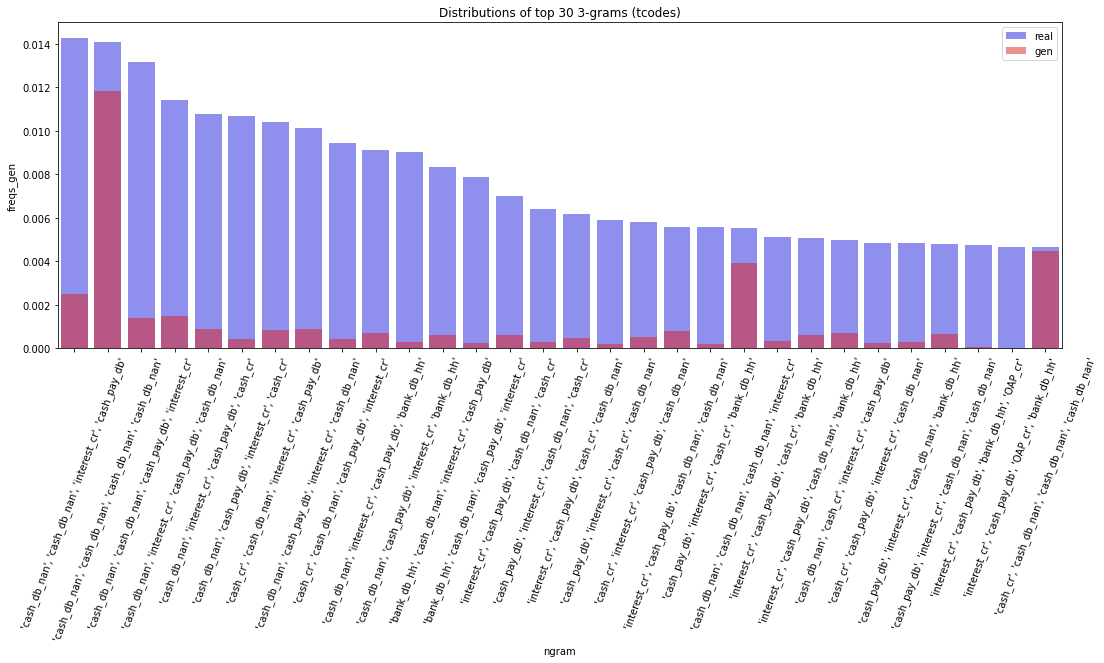

In [65]:

plt.figure(figsize=(18,6))
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_real", color="b", alpha=0.5, label="real")
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_gen", color="r", alpha=0.5, label="gen")
for item in barplt.get_xticklabels():
    item.set_rotation(70)
plt.title("Distributions of top 30 3-grams (tcodes)")    
plt.legend()
plt.show()

### Multi N

In [66]:
n_tcodes = len(real_df["tcode"].unique())

print("smoothed")
for n in range(1, 11):
    
    real_ngrams = create_ngramcount_df(real_df, n)
    gen_ngrams = create_ngramcount_df(gen_df, n)

    

    combo_df = pd.merge(real_ngrams, gen_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
        "counts_x":"counts_real", "freqs_x":"freqs_real", "counts_y":"counts_gen", "freqs_y":"freqs_gen", "index":"ngram"
    })
    


    combo_df["counts_real"] += 1
    combo_df["freqs_real"] = combo_df["counts_real"] / sum(combo_df["counts_real"])
    combo_df["counts_gen"] += 1
    combo_df["freqs_gen"] = combo_df["counts_gen"] / sum(combo_df["counts_gen"])
    
    jsd = jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"])
    p_corr = 1 / 2**(1-jsd) 
    print(f"{n}-grams:\t jsd = {jsd:.3f}\t ({p_corr:.3f})\t r-{len(real_ngrams)}\t ({len(real_ngrams)*100/n_tcodes**n:.2f}%)\
    \t g-{len(gen_ngrams)} \t ({len(gen_ngrams)*100/n_tcodes**n:.2f}%)")

smoothed
1-grams:	 jsd = 0.035	 (0.512)	 r-16	 (100.00%)    	 g-16 	 (100.00%)
2-grams:	 jsd = 0.129	 (0.547)	 r-180	 (70.31%)    	 g-233 	 (91.02%)
3-grams:	 jsd = 0.295	 (0.613)	 r-1320	 (32.23%)    	 g-2321 	 (56.67%)
4-grams:	 jsd = 0.441	 (0.679)	 r-6115	 (9.33%)    	 g-13521 	 (20.63%)
5-grams:	 jsd = 0.496	 (0.705)	 r-18861	 (1.80%)    	 g-43212 	 (4.12%)
6-grams:	 jsd = 0.454	 (0.685)	 r-43141	 (0.26%)    	 g-79426 	 (0.47%)
7-grams:	 jsd = 0.381	 (0.651)	 r-79051	 (0.03%)    	 g-100527 	 (0.04%)
8-grams:	 jsd = 0.314	 (0.622)	 r-121876	 (0.00%)    	 g-107124 	 (0.00%)
9-grams:	 jsd = 0.260	 (0.599)	 r-165620	 (0.00%)    	 g-107518 	 (0.00%)
10-grams:	 jsd = 0.218	 (0.581)	 r-206949	 (0.00%)    	 g-106414 	 (0.00%)
